In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90,high=90,size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f186aa03fc9f35ac9338a77c0bfe069


In [8]:
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5f186aa03fc9f35ac9338a77c0bfe069&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)

In [10]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 51.01,
  'feels_like': 38.21,
  'temp_min': 48.99,
  'temp_max': 53.01,
  'pressure': 1019,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 16.11, 'deg': 300},
 'clouds': {'all': 20},
 'dt': 1616852899,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1616841291,
  'sunset': 1616886238},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [11]:
boston_data.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [12]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat,lng,max_temp,humidity,clouds,wind)

42.3584 -71.0598 53.01 46 20 16.11


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-03-27 13:48:19'

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list.
        city_data.append({"City":city.title(),
                         "Lat":city_lat,
                         "Lng":city_lng,
                         "Max Temp":city_max_temp,
                         "Humidity":city_humidity,
                         "Cloudiness":city_clouds,
                         "Wind Speed":city_wind,
                         "Country":city_country,
                         "Date":city_date})

# If an error is experienced, skip the city.   
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | ust-maya
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | barawe
City not found. Skipping...
Processing Record 8 of Set 1 | lompoc
Processing Record 9 of Set 1 | gold coast
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | shubarkuduk
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | santa rosa
Processing Record 14 of Set 1 | sakakah
Processing Record 15 of Set 1 | ladario
Processing Record 16 of Set 1 | raudeberg
Processing Record 17 of Set 1 | cocorit
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | narsaq
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | leningradskiy


Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | manakara
Processing Record 42 of Set 4 | markova
Processing Record 43 of Set 4 | kontagora
Processing Record 44 of Set 4 | mahon
Processing Record 45 of Set 4 | kutum
Processing Record 46 of Set 4 | lanivtsi
Processing Record 47 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 48 of Set 4 | airai
Processing Record 49 of Set 4 | paamiut
Processing Record 50 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 1 of Set 5 | aviles
Processing Record 2 of Set 5 | longyearbyen
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | visnes
Processing Record 5 of Set 5 | loreto
Processing Record 6 of Set 5 | mae sot
Processing Record 7 of Set 5 | great yarmouth
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | maniitsoq
Processing Record 10 of Set 5 | buluang
Processing Record 11 of Set 5 | charters towers
Processing Record 12 of Set 5 | ba

Processing Record 29 of Set 8 | artyk
City not found. Skipping...
Processing Record 30 of Set 8 | imbituba
Processing Record 31 of Set 8 | bosansko grahovo
Processing Record 32 of Set 8 | marrakesh
Processing Record 33 of Set 8 | kloulklubed
Processing Record 34 of Set 8 | halalo
City not found. Skipping...
Processing Record 35 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 36 of Set 8 | cairns
Processing Record 37 of Set 8 | ipixuna
Processing Record 38 of Set 8 | gubkinskiy
Processing Record 39 of Set 8 | nantucket
Processing Record 40 of Set 8 | mwinilunga
Processing Record 41 of Set 8 | redcar
Processing Record 42 of Set 8 | miyako
Processing Record 43 of Set 8 | bosaso
Processing Record 44 of Set 8 | majene
Processing Record 45 of Set 8 | beloha
Processing Record 46 of Set 8 | ijaki
City not found. Skipping...
Processing Record 47 of Set 8 | byron bay
Processing Record 48 of Set 8 | monte azul
Processing Record 49 of Set 8 | sept-iles
Processing Record 50 of 

Processing Record 13 of Set 12 | marzuq
Processing Record 14 of Set 12 | hit
Processing Record 15 of Set 12 | tekeli
Processing Record 16 of Set 12 | gushikawa
Processing Record 17 of Set 12 | meyungs
City not found. Skipping...
Processing Record 18 of Set 12 | betare oya
Processing Record 19 of Set 12 | humaita
Processing Record 20 of Set 12 | iqaluit
Processing Record 21 of Set 12 | zambezi
Processing Record 22 of Set 12 | flinders
Processing Record 23 of Set 12 | sinegorye
Processing Record 24 of Set 12 | wajima
Processing Record 25 of Set 12 | yomitan
City not found. Skipping...
Processing Record 26 of Set 12 | boende
Processing Record 27 of Set 12 | gat
Processing Record 28 of Set 12 | tailai
Processing Record 29 of Set 12 | wulanhaote
City not found. Skipping...
Processing Record 30 of Set 12 | muisne
Processing Record 31 of Set 12 | brokopondo
Processing Record 32 of Set 12 | kiama
Processing Record 33 of Set 12 | bushehr
Processing Record 34 of Set 12 | dandong
Processing Recor

In [15]:
len(city_data)

560

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-27.40,75,1,4.61,CA,2021-03-27 13:49:35
1,Ust-Maya,60.4167,134.5333,23.25,97,100,4.43,RU,2021-03-27 13:49:35
2,Hobart,-42.8794,147.3294,55.40,67,95,14.97,AU,2021-03-27 13:49:35
3,Saldanha,-33.0117,17.9442,73.40,43,0,18.41,ZA,2021-03-27 13:49:36
4,Lompoc,34.6391,-120.4579,50.00,93,1,5.75,US,2021-03-27 13:47:51
5,Gold Coast,-28.0000,153.4333,71.01,94,13,3.44,AU,2021-03-27 13:46:43
6,Hilo,19.7297,-155.0900,69.80,73,20,6.91,US,2021-03-27 13:49:36
7,Shubarkuduk,49.1447,56.4872,31.86,95,100,8.59,KZ,2021-03-27 13:49:36
8,Upernavik,72.7868,-56.1549,-25.46,67,0,2.06,GL,2021-03-27 13:49:37
9,Santa Rosa,14.3122,121.1114,84.20,70,20,9.22,PH,2021-03-27 13:46:05


In [17]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2021-03-27 13:49:35,69.4541,-133.0374,-27.40,75,1,4.61
1,Ust-Maya,RU,2021-03-27 13:49:35,60.4167,134.5333,23.25,97,100,4.43
2,Hobart,AU,2021-03-27 13:49:35,-42.8794,147.3294,55.40,67,95,14.97
3,Saldanha,ZA,2021-03-27 13:49:36,-33.0117,17.9442,73.40,43,0,18.41
4,Lompoc,US,2021-03-27 13:47:51,34.6391,-120.4579,50.00,93,1,5.75
...,...,...,...,...,...,...,...,...,...
555,Shimoda,JP,2021-03-27 13:51:36,34.6667,138.9500,61.00,82,100,7.31
556,Yar-Sale,RU,2021-03-27 13:51:36,66.8333,70.8333,0.19,93,16,10.04
557,Poddorye,RU,2021-03-27 13:51:36,57.4695,31.1156,45.12,76,61,3.91
558,Slonim,BY,2021-03-27 13:51:36,53.0867,25.3219,54.10,48,15,11.74


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file,index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [20]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'03/27/21'

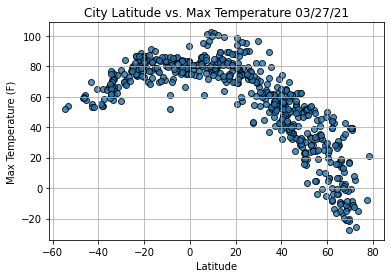

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + today)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

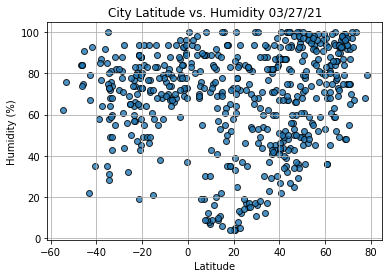

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + today)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

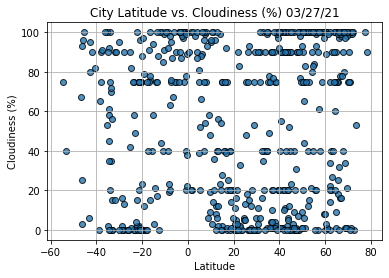

In [23]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + today)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show plot
plt.show()

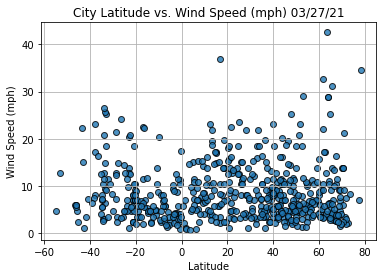

In [24]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor = "black", linewidths = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) " + today)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show plot
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress
        
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [53]:
city_data_df.loc[(city_data_df["Lat"]>=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuktoyaktuk,CA,2021-03-27 13:49:35,69.4541,-133.0374,-27.40,75,1,4.61
1,Ust-Maya,RU,2021-03-27 13:49:35,60.4167,134.5333,23.25,97,100,4.43
4,Lompoc,US,2021-03-27 13:47:51,34.6391,-120.4579,50.00,93,1,5.75
6,Hilo,US,2021-03-27 13:49:36,19.7297,-155.0900,69.80,73,20,6.91
7,Shubarkuduk,KZ,2021-03-27 13:49:36,49.1447,56.4872,31.86,95,100,8.59


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

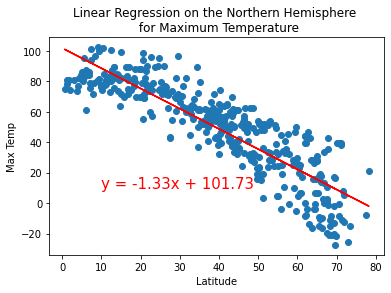

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 
                       "Max Temp", (10,10))

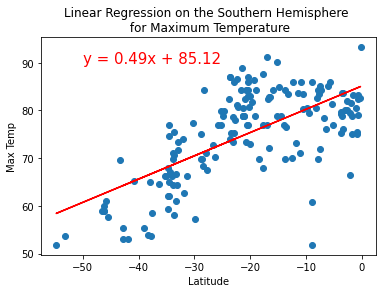

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 
                       "Max Temp", (-50,90))

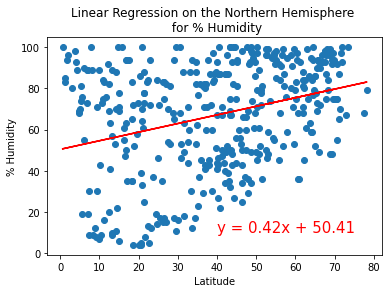

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Humidity", 
                       "% Humidity", (40,10))

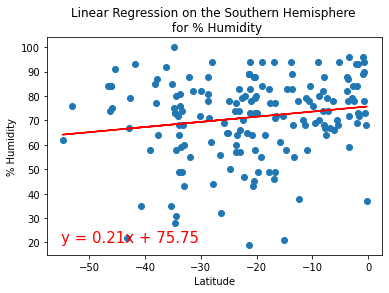

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Humidity", 
                       "% Humidity", (-55,20))

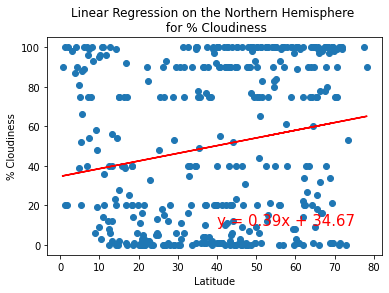

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness", (40,10))

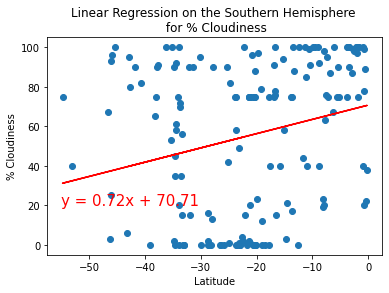

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for % Cloudiness", 
                       "% Cloudiness", (-55,20))

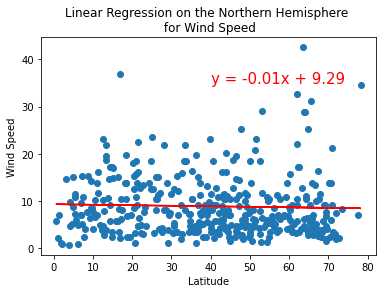

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere \n for Wind Speed", 
                       "Wind Speed", (40,35))

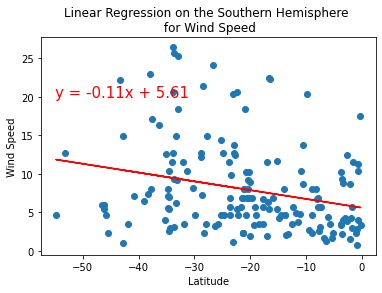

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed", 
                       "Wind Speed", (-55,20))